In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import geopandas as gpd
from shapely.geometry import Point, Polygon



<Axes: >

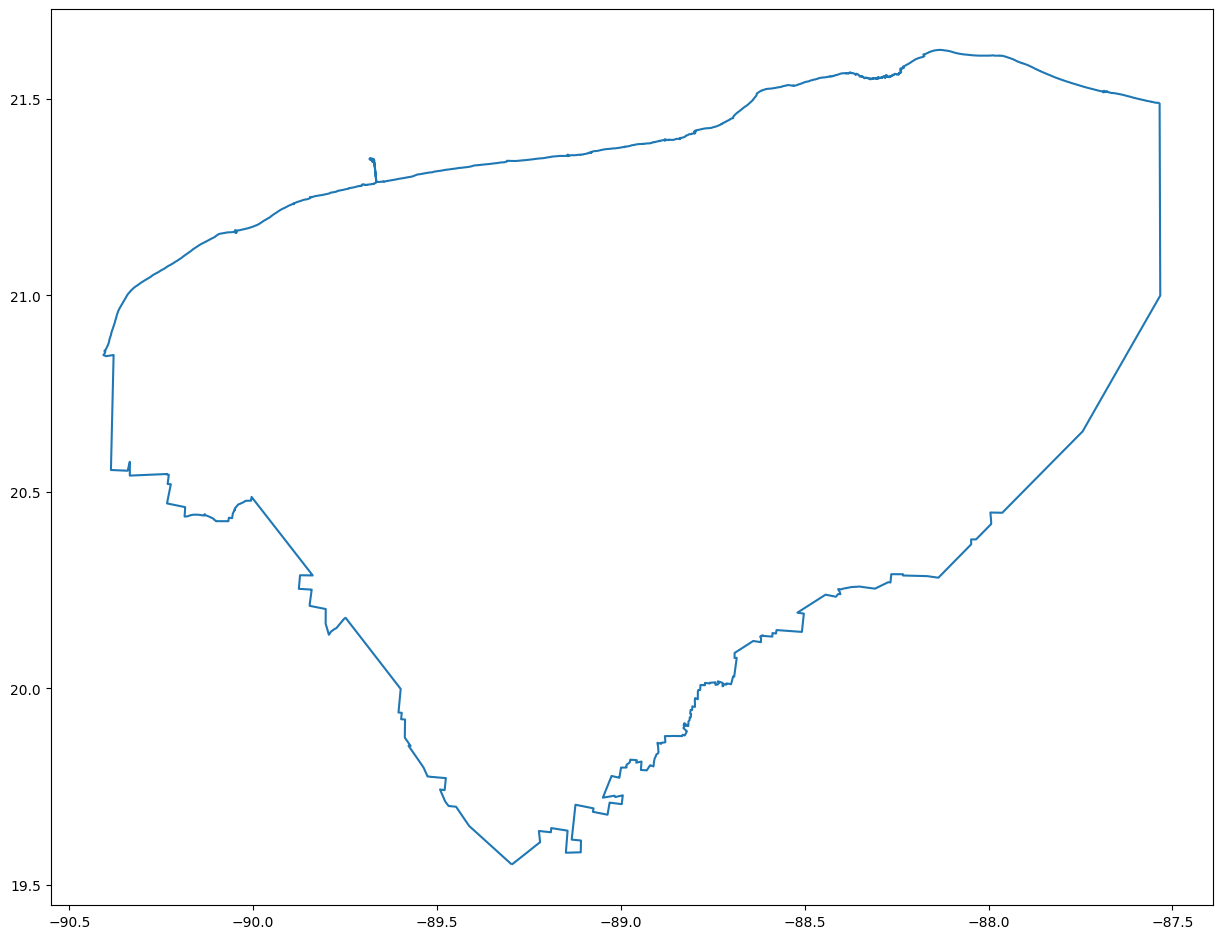

In [78]:
map = gpd.read_file('geo-data/limite250_l_.shp')
fig, ax = plt.subplots(figsize=(15,15))
map.get_geometry(0).plot(ax=ax)

In [92]:

coords = map.get_geometry(0).polygonize()
coords = coords.sample_points(size=1000).get_coordinates()
coords.rename(columns={"x": "Longitud", "y": "Latitud"},inplace=True)
coords.to_csv('data/list_points.csv',index=False)


c:\Users\seder\code\locust\.venv\Lib\site-packages\pyproj\crs\crs.py:141: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)


<Axes: >

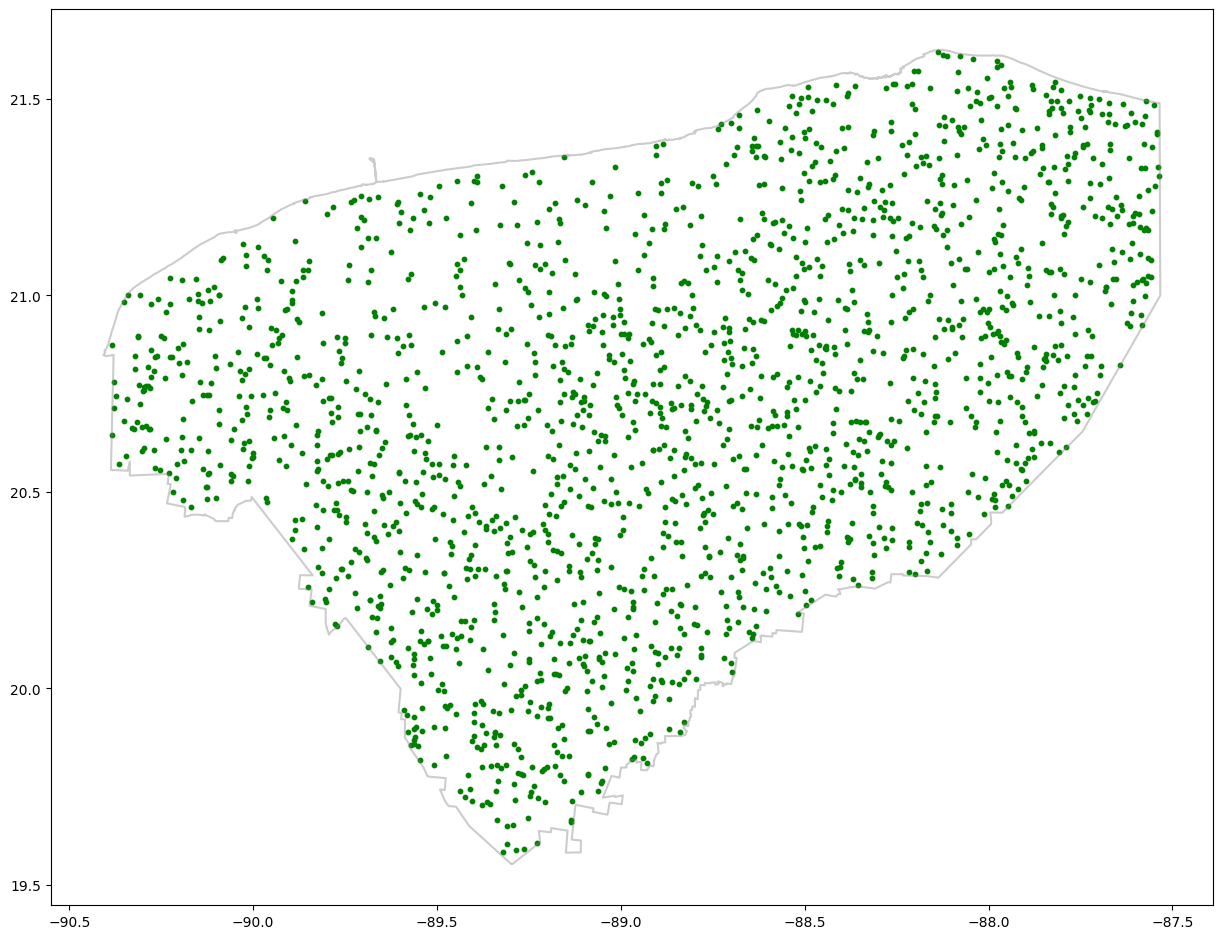

In [87]:

crs = {'init':'epsg:4326'}
geometry = [Point(xy) for xy in zip(coords['x'], coords['y'])]
geo_df = gpd.GeoDataFrame(coords, #specify our data
                          crs=crs, #specify our coordinate reference system
                          geometry=geometry) 
fig, ax = plt.subplots(figsize=(15,15))
map.plot(ax=ax, alpha=0.4, color='grey')
geo_df.plot(ax=ax, 
                                       markersize=10, 
                                       color='green', 
                                       marker='o', 
                                       label='Negativo')


In [89]:
data = pd.read_csv('data/2023.csv')
data.head()


,Fecha,Latitud,Longitud,Ubicacion,Municipio,Comunidad,Productor,Cultivo,Variedad,Etapa_Fenologica,...,ProductorID,AnoMapa,Version,SitioID,ActividadID,ID,AddRecord,ChangeRecord,SMARTPHONE,Anual
0,1/3/2023,20.85595,-90.25643,179_VS00-31-011-0012,CELESTUN,CELESTUN,FELIX AGUILAR,MONTE,VARIOS,DESARROLLO VEGETATIVO,...,901755,2023,45294.6183,318,308,742976,44935.42503,44935.42784,0,NaN
1,1/3/2023,20.85498,-90.26168,179_VS00-31-011-0011,CELESTUN,CELESTUN,AGUSTIN AGUILAR MAY,MONTE,VARIOS,DESARROLLO VEGETATIVO,...,632651,2023,45294.6183,318,308,742977,44935.42517,44935.42790,0,NaN
2,1/3/2023,20.81349,-90.19725,179_VS00-31-011-0005,CELESTUN,CELESTUN,MANUEL SOLIS,MONTE,VARIOS,DESARROLLO VEGETATIVO,...,411167,2023,45294.6183,318,308,742980,44935.42572,44935.42805,0,NaN
3,1/3/2023,20.80072,-90.19945,179_VS00-31-011-0009,CELESTUN,CELESTUN,GUADALUPE DE JESUS PEREZ VELA,MONTE,VARIOS,DESARROLLO VEGETATIVO,...,901757,2023,45294.6183,318,308,742981,44935.42585,44935.42813,0,NaN
4,1/3/2023,20.83347,-90.21466,179_VS00-31-011-0007,CELESTUN,CELESTUN,MARIO CEBALLOS PINTO,MONTE,VARIOS,DESARROLLO VEGETATIVO,...,747935,2023,45294.6183,318,308,742978,44935.42534,44935.42794,0,NaN


In [ ]:
data = data[data['Actividad_Realizada'] == 'Exploración']

data

In [ ]:
ax = sns.countplot(x="Resultado",data=data,palette = "Set2")


In [ ]:
data_map = data[["Latitud", "Longitud","Resultado"]]
data_map
crs = {'init':'epsg:4326'}
geometry = [Point(xy) for xy in zip(data_map['Longitud'], data_map['Latitud'])]
geo_df = gpd.GeoDataFrame(data_map, #specify our data
                          crs=crs, #specify our coordinate reference system
                          geometry=geometry) 


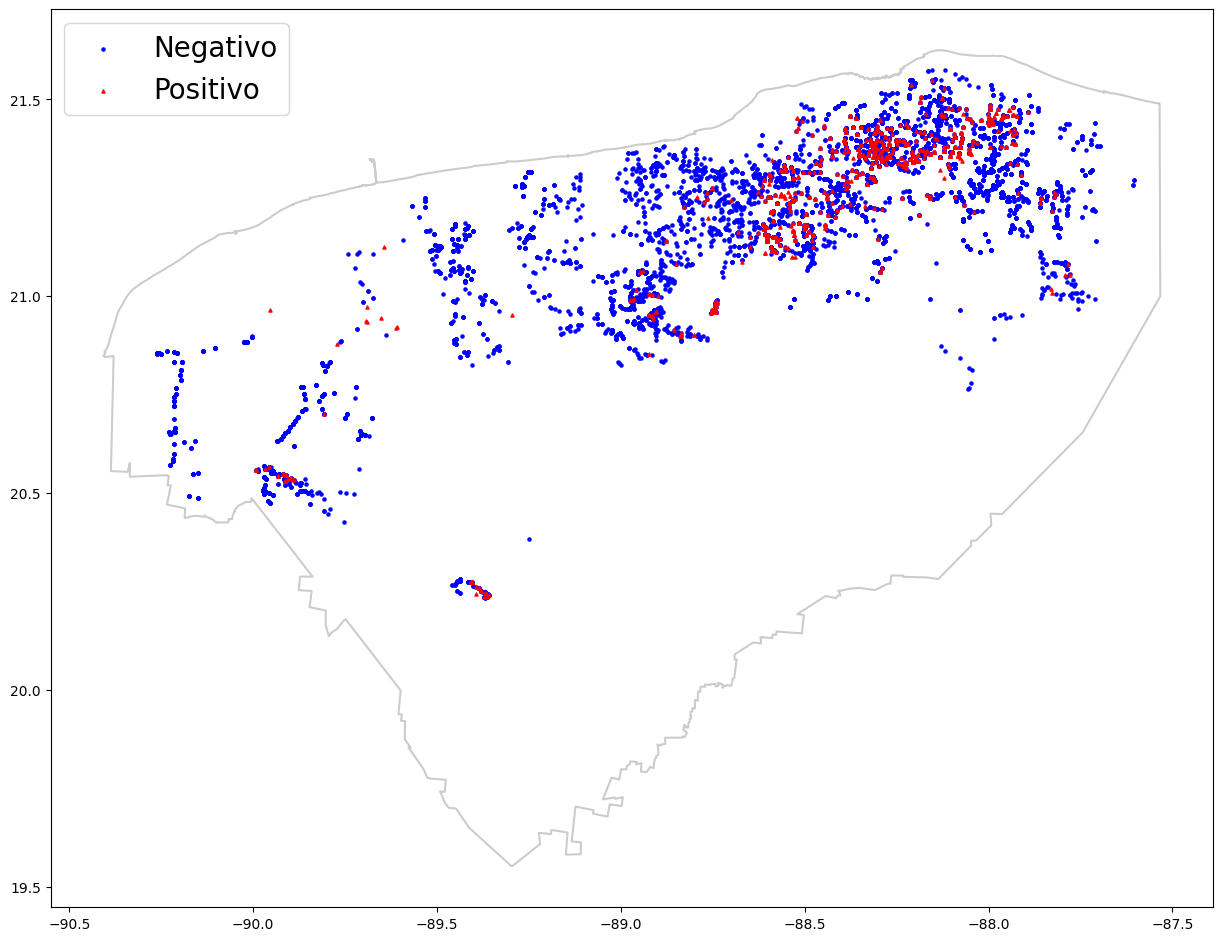

In [84]:
fig, ax = plt.subplots(figsize=(15,15))
map.plot(ax=ax, alpha=0.4, color='grey')
geo_df[geo_df['Resultado'] == 'Negativo'].plot(ax=ax, 
                                       markersize=5, 
                                       color='blue', 
                                       marker='o', 
                                       label='Negativo')
geo_df[geo_df['Resultado'] == 'Positivo'].plot(ax=ax, 
                                       markersize=5, 
                                       color='red', 
                                       marker='^', 
                                       label='Positivo')
plt.legend(prop={'size':20})
